# Problem Statement

**To Predict the sales price of each house.**

## Business Objective:

This project implements a machine learning solution that analyze the various house dimesnsions to predict sales price,
helping stakeholders to make data-driven decisions.

## Goal Setting:

In today's dynamic real estate market, accurate house sales price prediction is crucial for various stakeholders:

- **Home Buyers** : want to ensure they're making fair offer.
- **Real Estate Agent** : Need realiable price estimate to advise client effectively.
- **Investors** : Require accurate valuation for investment decisions.
- **Sellers** : Need to set competitive listing price.

# Import Libraries

In [62]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sidetable

## Display Setting 

In [63]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Data Ingestion & Basic Understanding

In [64]:
path = Path.cwd().parent
files = []
for i in path.rglob('*.csv*'):
    files.append(i)
    print(i.name)
    print(files.index(i),' ',i)


sample_submission.csv
0   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\sample_submission.csv
test.csv
1   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\test.csv
train.csv
2   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\train.csv


In [65]:
df_test = pd.read_csv(files[1])
df_test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [66]:
df_train = pd.read_csv(files[2])
df_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [67]:
df_train.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [68]:
df_train.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1060,1061,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616,Unf,0,722,1338,GasA,Ex,Y,SBrkr,1338,0,0,1338,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2,582,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500


In [69]:
df_train.shape
print('Number of rows :', df_train.shape[0])
print('Number of columns :', df_train.shape[1])

Number of rows : 1460
Number of columns : 81


In [70]:
# remove whitespace from columns
df_train.columns = df_train.columns.str.strip()

df_test.columns = df_test.columns.str.strip()

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The data was collected by De Cock where 81 dimensions were recorded for 1460 properties in Ames IA.

Brief description of columns:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

- **MSSubClass**: The building class

- **MSZoning**: The general zoning classification

- **LotFrontage**: Linear feet of street connected to property

- **LotArea**: Lot size in square feet

- **Street**: Type of road access

- **Alley**: Type of alley access

- **LotShape**: General shape of property

- **LandContour**: Flatness of the property

- **Utilities**: Type of utilities available

- **LotConfig**: Lot configuration

- **LandSlope**: Slope of property

- **Neighborhood**: Physical locations within Ames city limits

- **Condition1**: Proximity to main road or railroad

- **Condition2**: Proximity to main road or railroad (if a second is present)

- **BldgType**: Type of dwelling

- **HouseStyle**: Style of dwelling

- **OverallQual**: Overall material and finish quality

- **OverallCond**: Overall condition rating

- **YearBuilt**: Original construction date

- **YearRemodAdd**: Remodel date

- **RoofStyle**: Type of roof

- **RoofMatl**: Roof material

- **Exterior1st**: Exterior covering on house

- **Exterior2nd**: Exterior covering on house (if more than one material)

- **MasVnrType**: Masonry veneer type

- **MasVnrArea**: Masonry veneer area in square feet

- **ExterQual**: Exterior material quality

- ExterCond: Present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Number of bedrooms above basement level

- Kitchen: Number of kitchens

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality rating

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold

- YrSold: Year Sold

- SaleType: Type of sale

- SaleCondition: Condition of sale

**This dataset represents the sale of  residential property in Ames, Iowa, where every single record represents a sale of individual house.
There are 23 nominal, 23 ordinal, 14 discrete, and 20 continuous features describing each house’s size, quality, area, age, and other miscellaneous attributes.
The data spans from 2006 to 2010.**

In [72]:
data_dtype = pd.DataFrame(index=df_train.columns, columns=['Dtype','nunique','unique'])
data_dtype['Dtype'] = df_train.dtypes
data_dtype['nunique'] = df_train.nunique()
data_dtype['unique'] = [df_train[col].unique() for col in df_train.columns]
data_dtype

,Dtype,nunique,unique
Id,int64,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
MSSubClass,int64,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
MSZoning,object,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
Street,object,2,"[Pave, Grvl]"
Alley,object,2,"[nan, Grvl, Pave]"
LotShape,object,4,"[Reg, IR1, IR2, IR3]"
LandContour,object,4,"[Lvl, Bnk, Low, HLS]"
Utilities,object,2,"[AllPub, NoSeWa]"


## Univariate & Multivariate Feature Relationships

In [73]:
## columns with different unique values
file = []
for col in df_train.columns:
    if df_train[col].nunique() == len(df_train) | df_train[col].nunique() >= .50 * len(df_train):
        file.append(col)
    
file

['Id']

In [74]:
X, y = (
    df_train[df_train.columns.difference(['Id','SalePrice'])],
    df_train['SalePrice']
)

**Distribution of dependent variable**

<Axes: xlabel='SalePrice', ylabel='Count'>

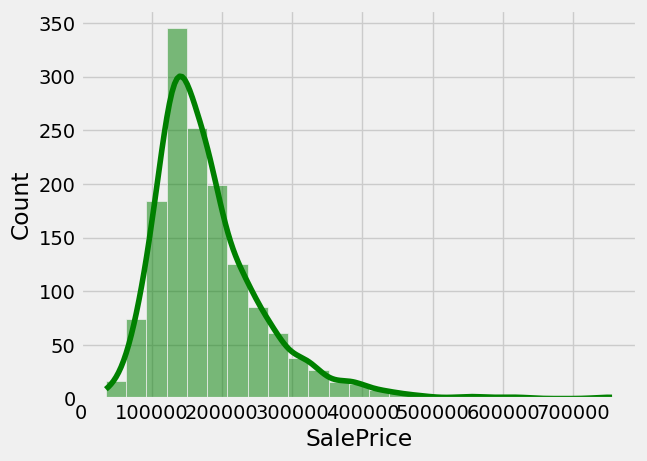

In [75]:
sns.histplot(y, bins=25,kde=True,color='green')

**Distribution plot of Numerical Features**

In [76]:
## Numerical features distibution
numeric_df = X.select_dtypes(include='number')
numeric_df.dtypes.value_counts()

int64      33
float64     3
Name: count, dtype: int64

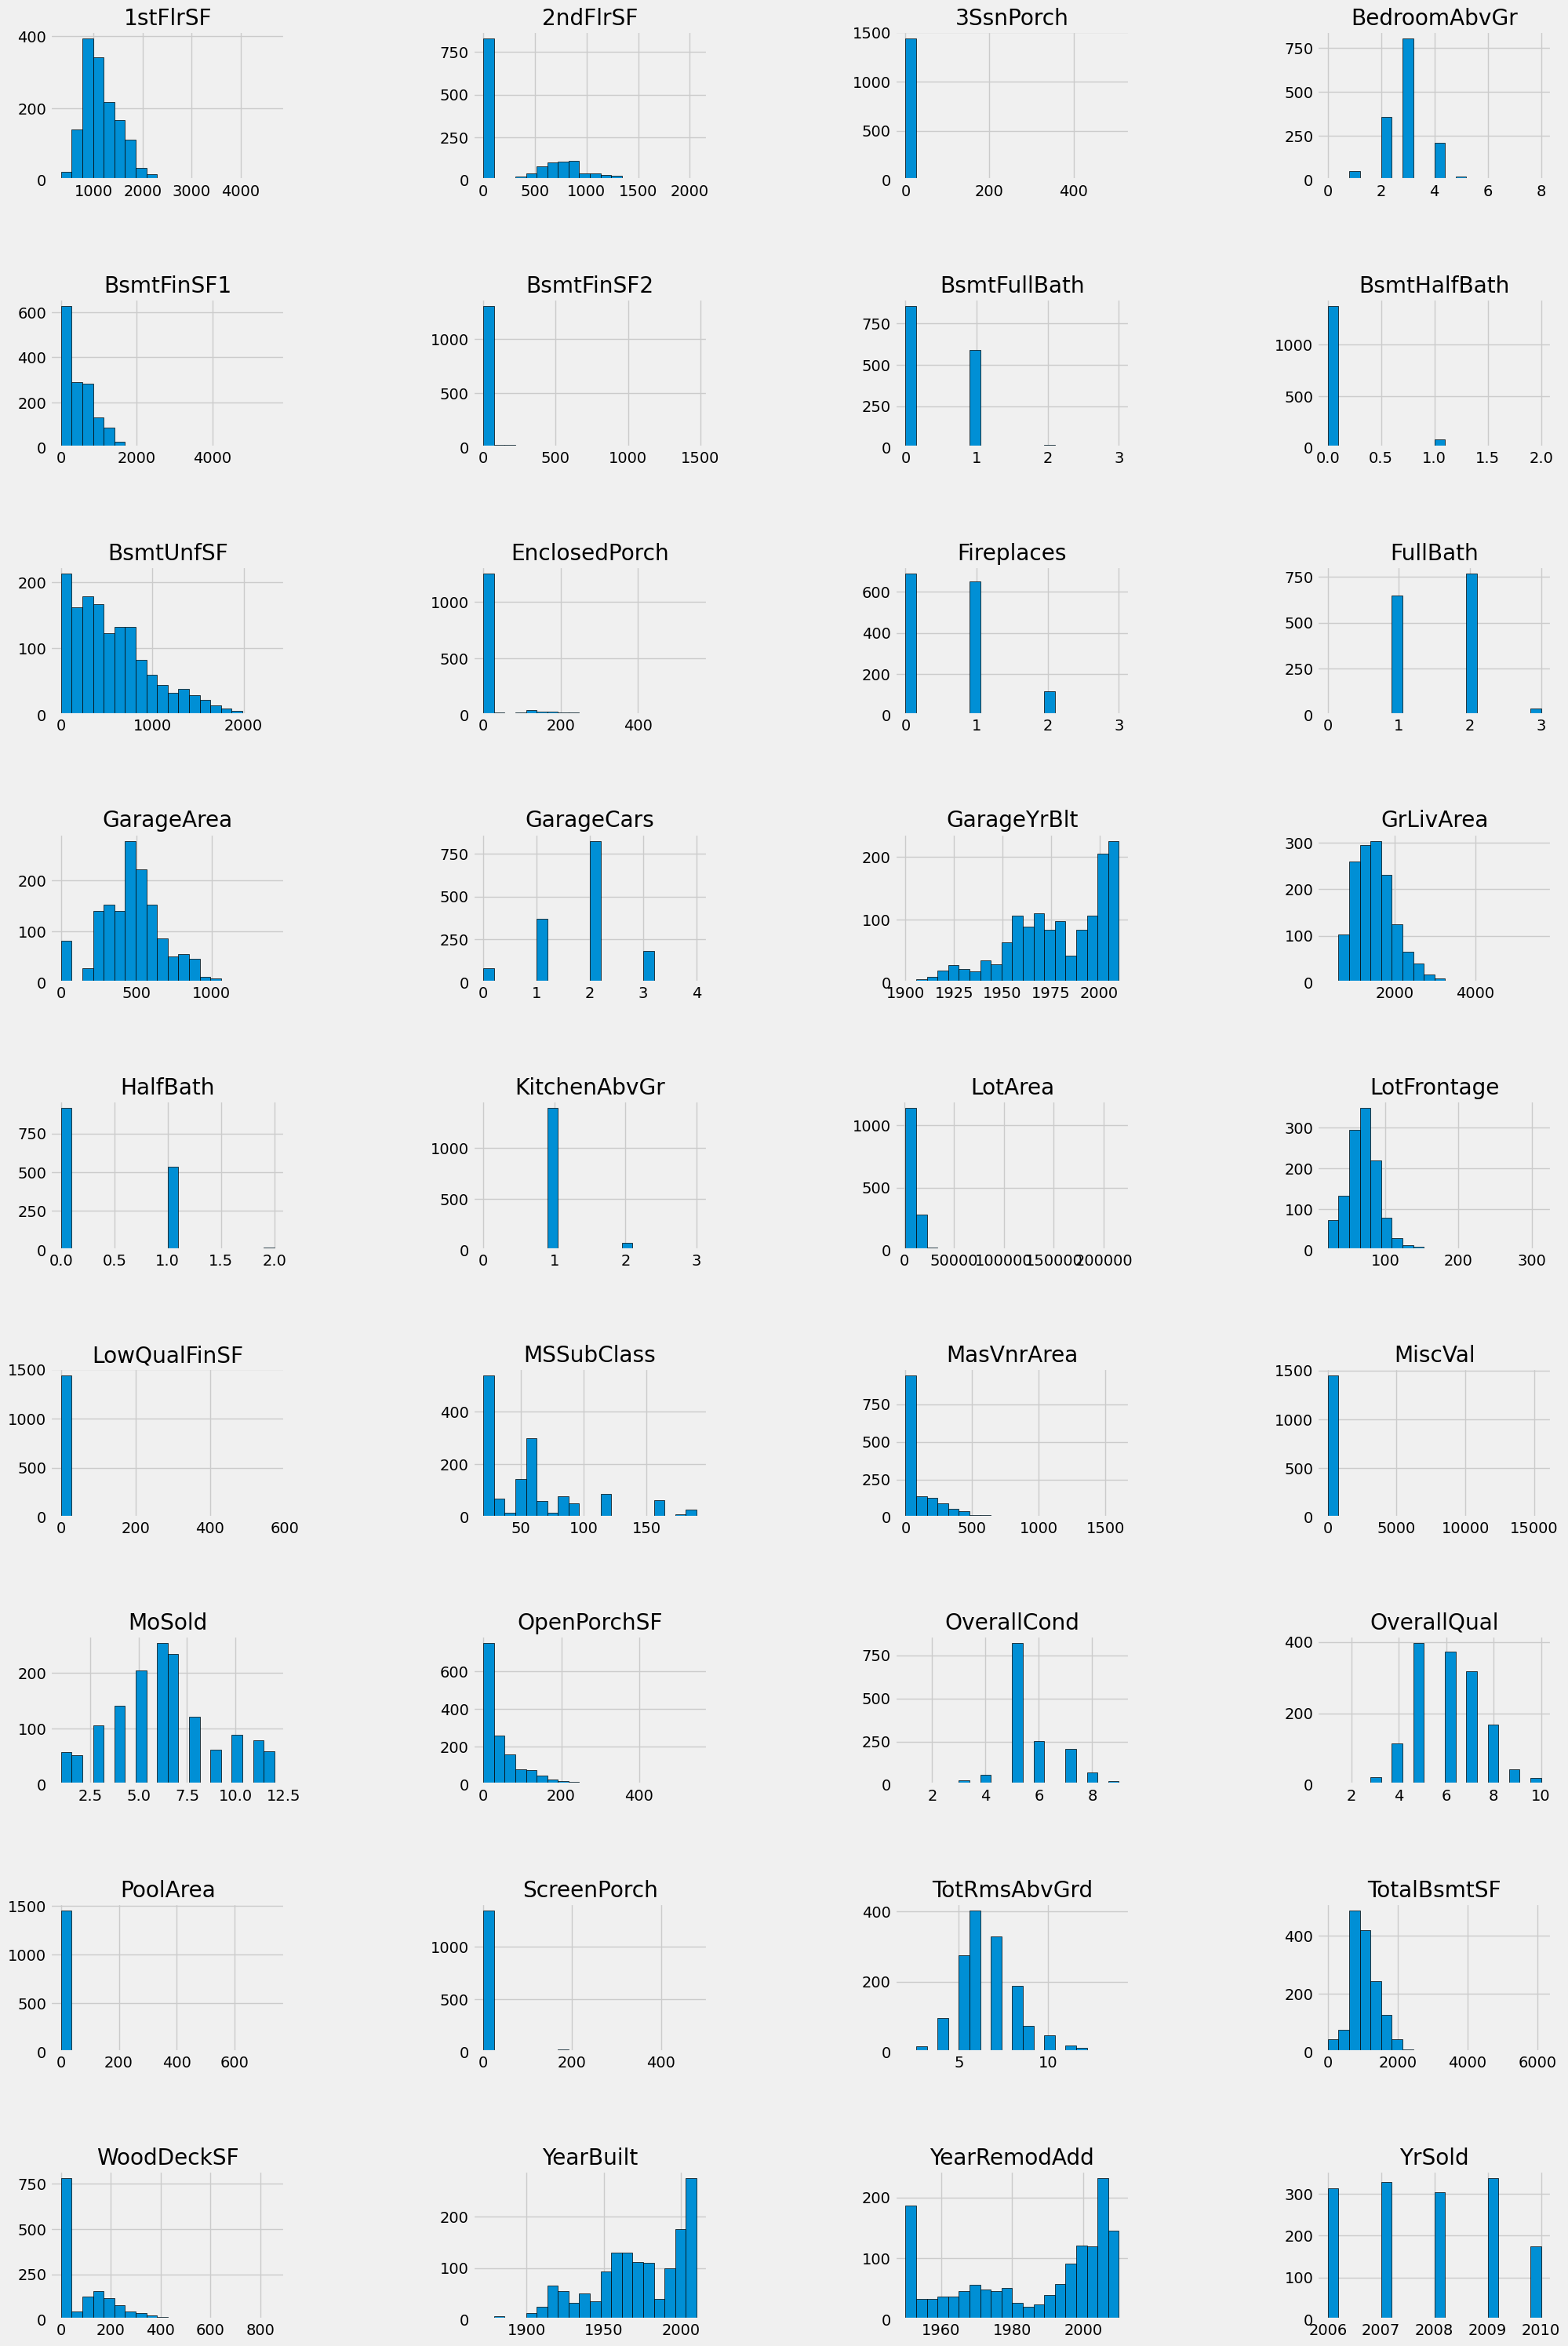

In [77]:
def plot_univariate_numerical_features(df:pd.DataFrame,nrows:int=9, ncol: int=4, figsize: tuple=(22,36),bins:int=20) -> None:    
    numeric_df = df.select_dtypes(include='number')
    numeric_df.hist(bins=bins, figsize=figsize,edgecolor='black',layout=(nrows,ncol))
    plt.subplots_adjust(hspace=0.8,wspace=0.8)



plot_univariate_numerical_features(X)

**Scatter plot for Numerical Features vs Salesprice**

In [78]:
numeric_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

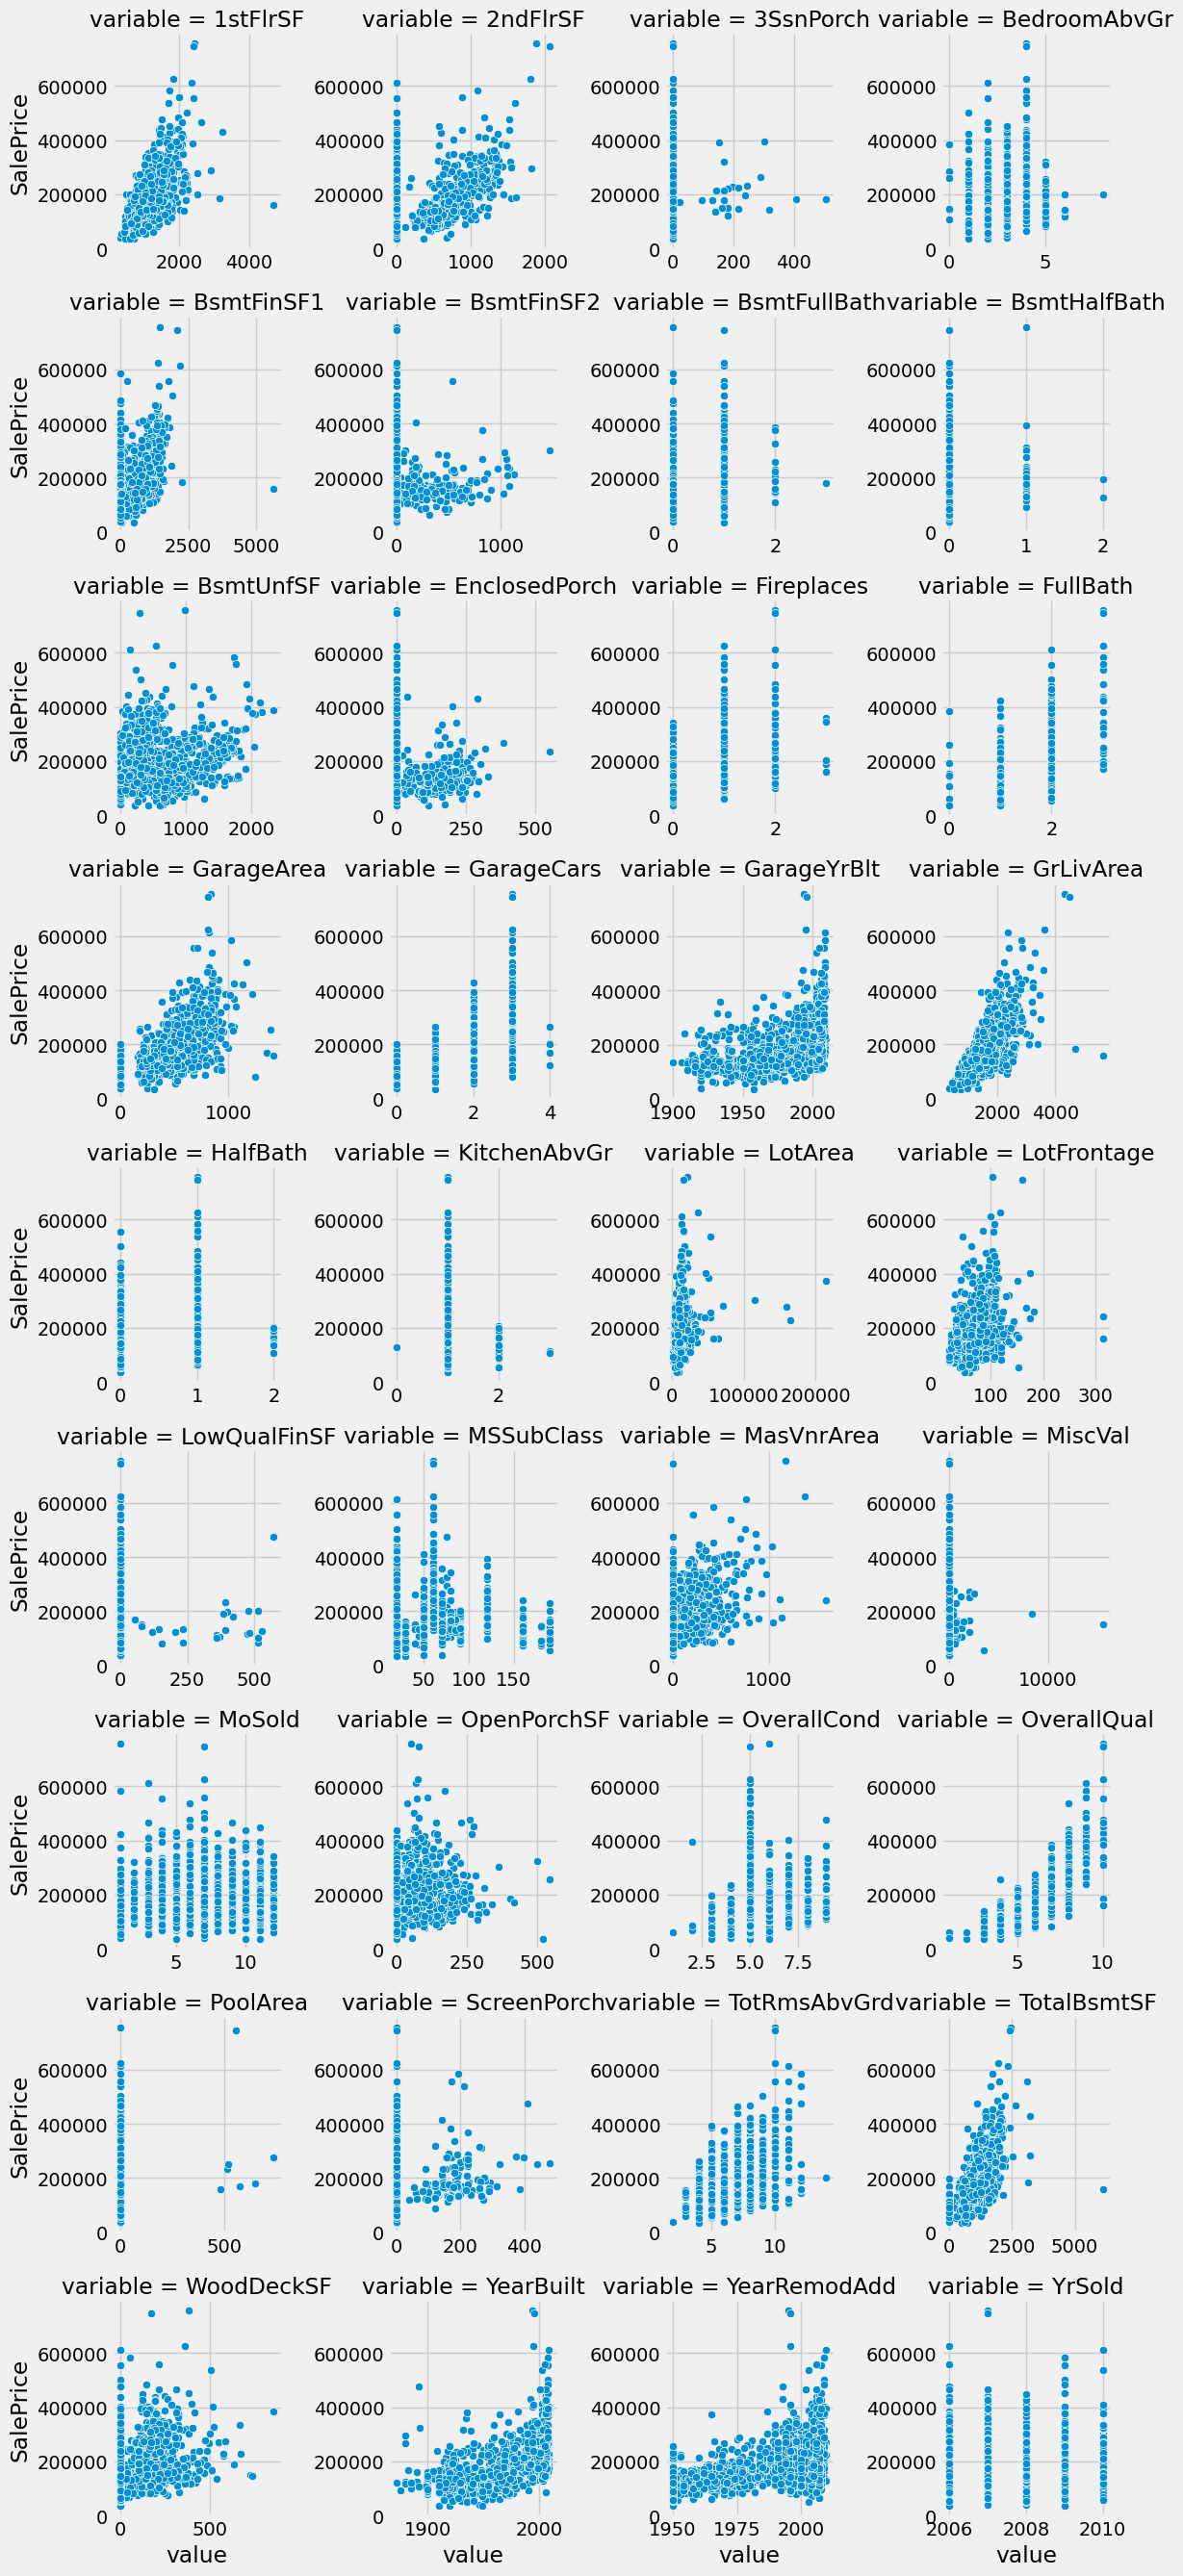

In [79]:
nd = pd.melt(df_train,id_vars='SalePrice',value_vars=numeric_df.columns)
g = sns.FacetGrid(nd, col='variable',col_wrap=4,sharex=False,sharey=False)
n1 = g.map_dataframe(sns.scatterplot,x='value',y='SalePrice')
n1

**Distibution of Categorical dimensions**

In [80]:
cat_df = X.select_dtypes(exclude='number')
cat_df.dtypes.value_counts()

object    43
Name: count, dtype: int64

In [81]:
 def plot_categorical_dimensions(df:pd.DataFrame) -> None:  
    cat_df = df.select_dtypes(include='object')
    nd_cat = pd.melt(cat_df, value_vars=cat_df.columns)
    n2 = sns.FacetGrid(nd_cat, col='variable',col_wrap=4,sharex=False,sharey=False)
    n2 = n2.map_dataframe(sns.countplot, 'value')
    n2.set_xticklabels(rotation=60)
    n2.tight_layout()
 


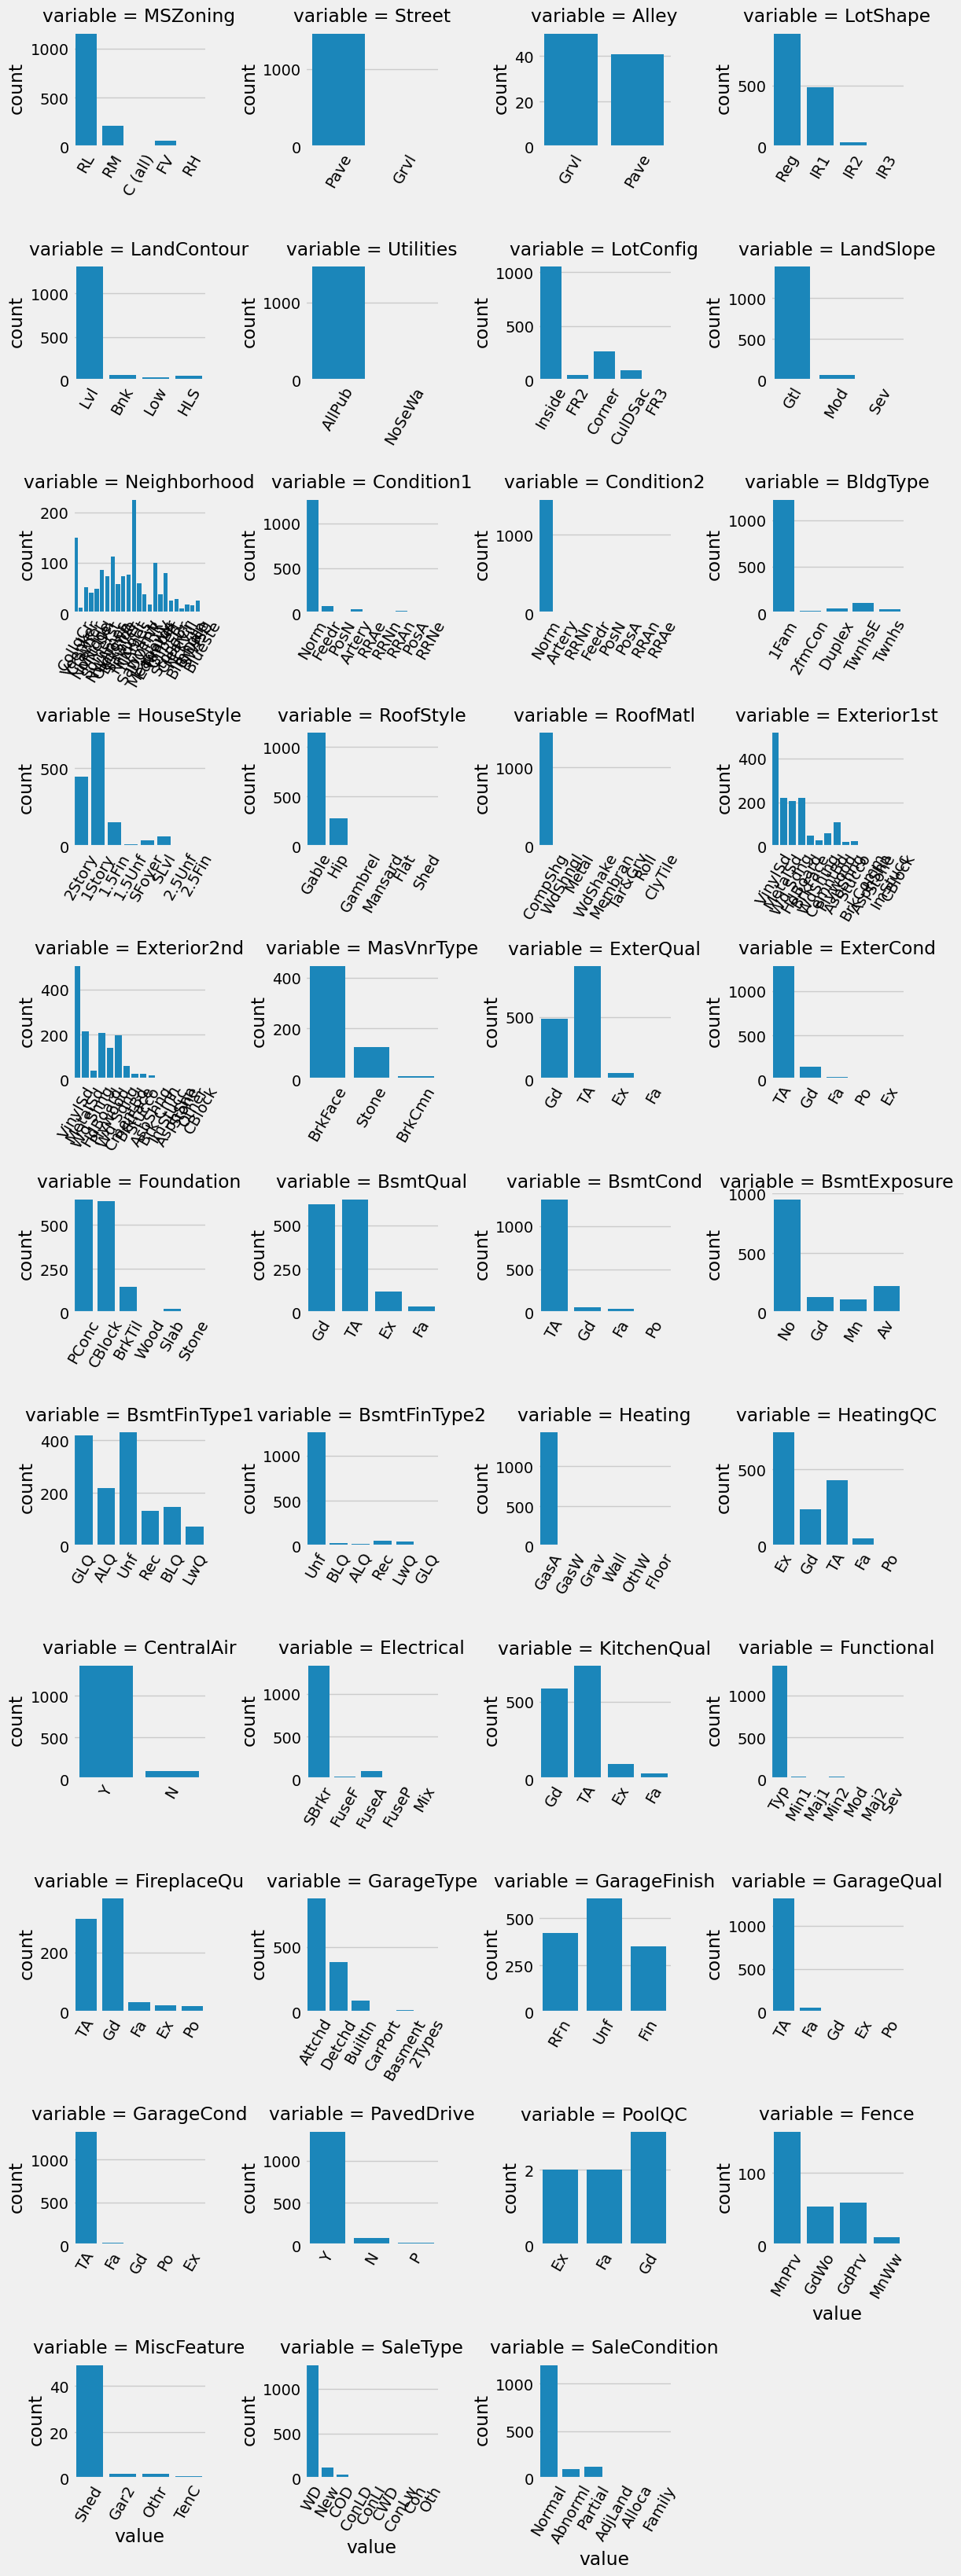

In [82]:
plot_categorical_dimensions(df_train)

**Box plot for categorical dimensions vs Saleprice**

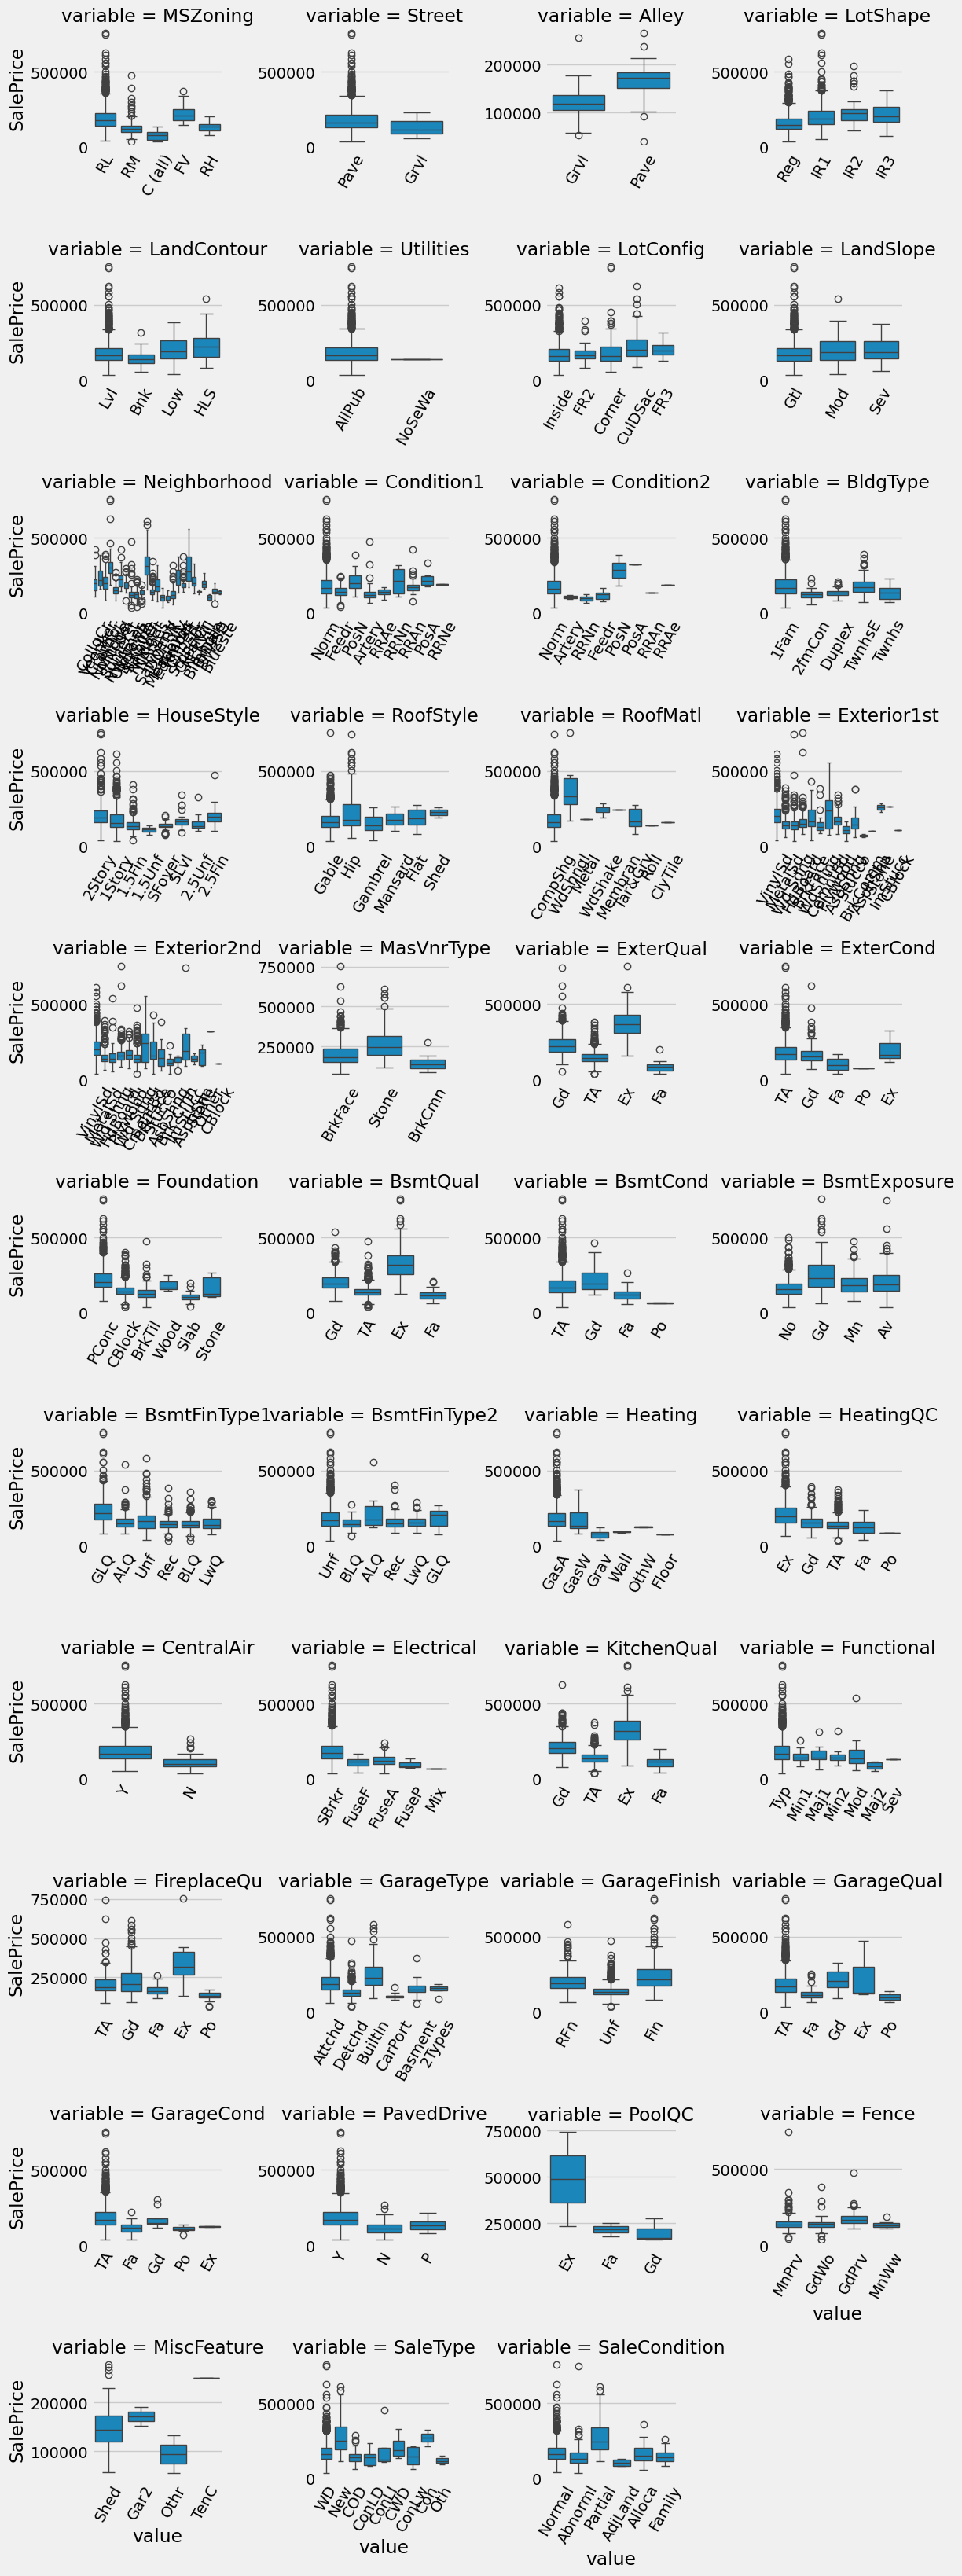

In [83]:
cat_df = df_train.select_dtypes(include='object')
cat_nd = pd.melt(df_train,id_vars='SalePrice',value_vars=cat_df.columns)
n3 = sns.FacetGrid(cat_nd,col='variable',col_wrap=4, sharex=False,sharey=False)
n3 = n3.map_dataframe(sns.boxplot,'value','SalePrice')
n3.set_xticklabels(rotation=60)
n3.tight_layout()


**Number of property sold By Month and Year**

In [84]:
df_train.columns[(df_train.columns.str.contains(pat='mo',case=False) | df_train.columns.str.contains(pat='yr',case=False))]

Index(['YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'], dtype='object')

In [85]:
df_train[['YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   GarageYrBlt   1379 non-null   float64
 2   MoSold        1460 non-null   int64  
 3   YrSold        1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [86]:
date_df = pd.crosstab(numeric_df['MoSold'],numeric_df['YrSold'])
date_df.style.highlight_max(axis='index',color='blue').highlight_min(axis='index',color='red')

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,10,13,13,12,10
2,9,8,10,10,15
3,25,23,18,19,21
4,27,23,26,26,39
5,38,43,38,37,48
6,48,59,51,59,36
7,67,51,49,61,6
8,23,40,29,30,0
9,15,11,17,20,0


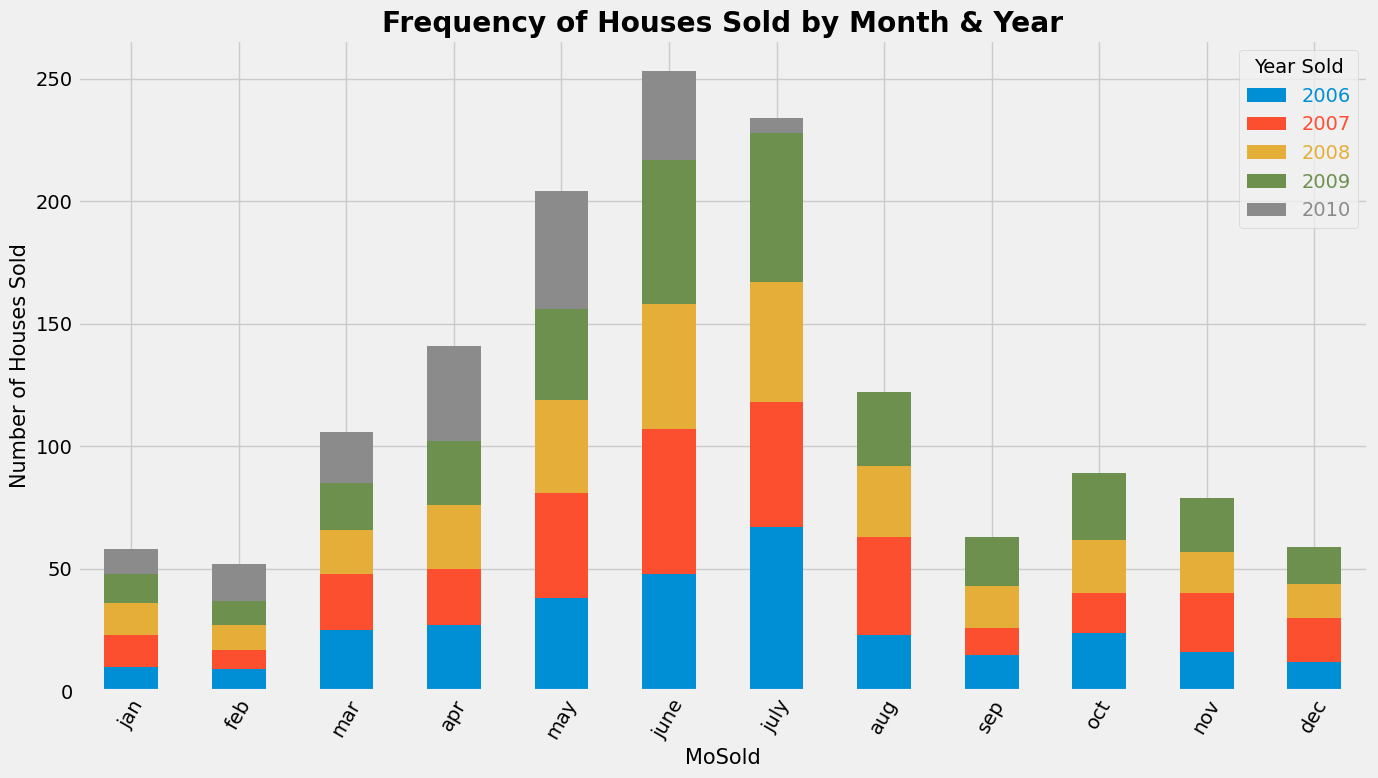

In [87]:
plt.style.use('fivethirtyeight')
date_df.plot(kind='bar',stacked=True,figsize=(14,8))
plt.gca().set_xticks(ticks=np.arange(0,12,1),labels=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],rotation=60)
plt.title('Frequency of Houses Sold by Month & Year',fontweight='bold',loc='center')
plt.ylabel('Number of Houses Sold',fontsize=15)
plt.xlabel('MoSold',fontsize=15)
plt.legend(labelcolor='linecolor',title='Year Sold')
plt.tight_layout()
plt.show()

**SalePrice Behaviour accross Months and Years**

In [88]:
sale_df = pd.pivot_table(data=df_train,index='MoSold',columns='YrSold',values='SalePrice',fill_value=0)
sale_df.style.highlight_max(axis='index',color='blue').highlight_min(axis='index',color='red').format(precision=2)

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,201090.00,183234.62,178504.69,189735.50,163852.60
2,194322.22,176301.75,159370.00,187450.00,174823.33
3,184982.20,176567.78,178505.28,171547.37,203181.29
4,174312.81,170772.61,159293.35,181680.77,171344.03
5,158928.29,169873.51,188334.47,164482.95,178422.25
6,172283.33,179725.81,169730.94,183260.93,181639.58
7,183211.06,195396.84,174562.65,197984.41,121750.00
8,196239.96,183941.08,196076.97,165670.97,0.00
9,223768.87,195533.82,169626.47,196849.35,0.00


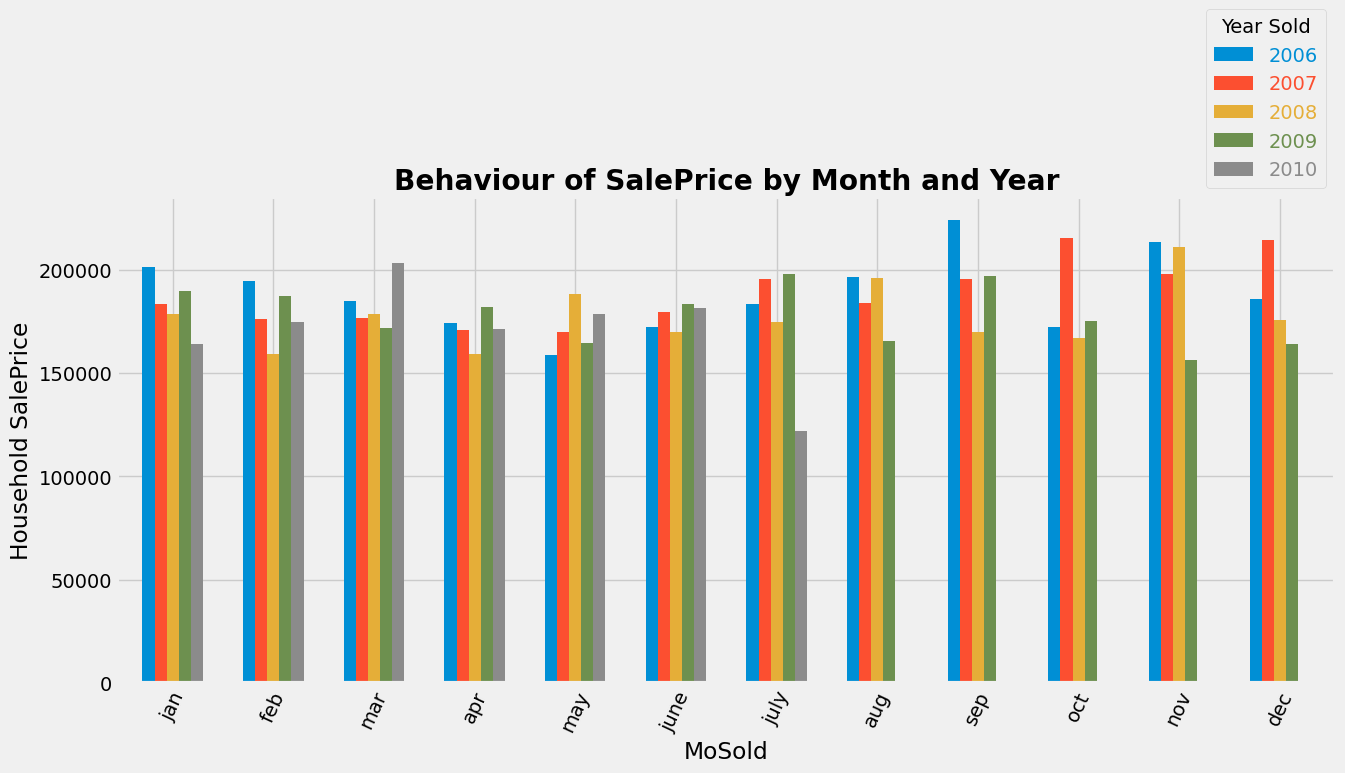

In [89]:
sale_df.plot(kind='bar',width=0.6,figsize=(14,6))
plt.xticks(ticks=np.arange(0,12,1),labels=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],rotation=65)
plt.ylabel('Household SalePrice')
plt.title('Behaviour of SalePrice by Month and Year',fontweight='bold')
plt.legend(loc='lower right',bbox_to_anchor = (1,1),title='Year Sold',labelcolor='linecolor')
plt.show()

## Missing Value Analysis and Treatment

In [90]:
   def plot_null_counts(df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame: 
    null_info = df.stb.missing().reset_index().rename({'index':'Features'},axis='columns').sort_values(by='percent',ascending=False)
    null_info['columns_dtype'] = [df[col].dtype for col in null_info['Features']]

    null_info = null_info.loc[null_info['missing']>0].head(top_n)
    print(null_info)

    plt.figure(figsize=(8,6))
    sns.barplot(x='percent', y='Features',data=null_info)
    plt.title('Top Features with Highest Percentage of Null Values')
    plt.xlabel(' % Null Values')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    return

       Features  missing  total    percent columns_dtype
0        PoolQC     1453   1460  99.520548        object
1   MiscFeature     1406   1460  96.301370        object
2         Alley     1369   1460  93.767123        object
3         Fence     1179   1460  80.753425        object
4    MasVnrType      872   1460  59.726027        object
5   FireplaceQu      690   1460  47.260274        object
6   LotFrontage      259   1460  17.739726       float64
7    GarageQual       81   1460   5.547945        object
8  GarageFinish       81   1460   5.547945        object
9    GarageType       81   1460   5.547945        object


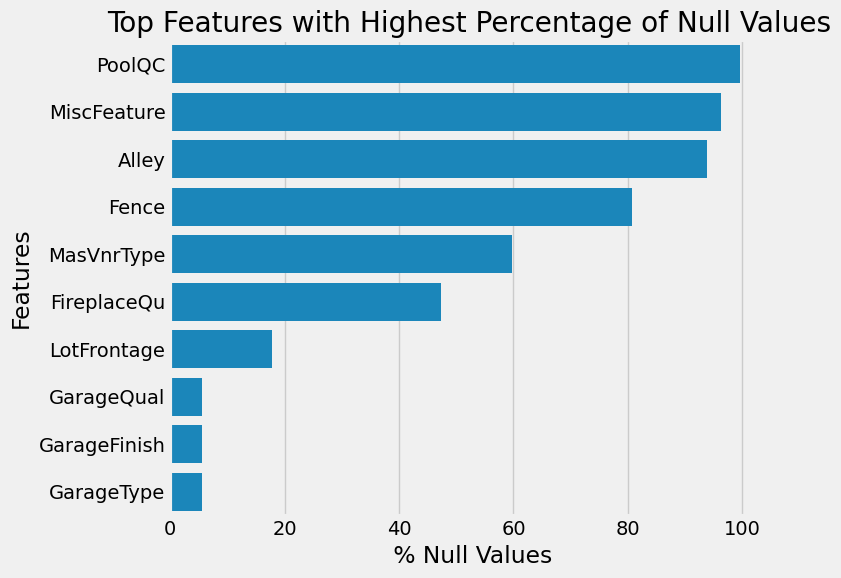

In [91]:
plot_null_counts(df_train)

**Most(>50%) missing values are of categorical features.**

## Outlier Analysis and Treatment

In [93]:
def calculate_outlier_percentage(df: pd.DataFrame, lower_percentile: float = 1, upper_percentile: float = 99) -> pd.DataFrame:
    """
    Calculates the percentage of outliers based on winsorization for all numerical variables in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    lower_percentile (float, optional): The lower percentile for winsorization. Default is 5.
    upper_percentile (float, optional): The upper percentile for winsorization. Default is 95.

    Returns:
    pd.DataFrame: A DataFrame containing the column names and the percentage of outliers.
    """
    outlier_percentages = {}

    numerical_cols = df.select_dtypes(include=[np.number]).columns

    for col in numerical_cols:
        x_low, x_high = np.percentile(df[col].dropna(), [lower_percentile, upper_percentile])
        total_values = len(df[col])
        outliers = len(df[~df[col].between(x_low, x_high)])
        outlier_percentage = round((outliers / total_values) * 100, 2)
        outlier_percentages[col] = outlier_percentage

    outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Numerical Features', 'Outliers Percentage'])
    return outlier_df

# Example usage
outlier_percentages = calculate_outlier_percentage(df_train)
print(outlier_percentages.sort_values(by = 'Outliers Percentage', ascending = False).reset_index(drop = True))


   Numerical Features  Outliers Percentage
0         LotFrontage                18.56
1         GarageYrBlt                 6.44
2           GrLivArea                 2.05
3           SalePrice                 2.05
4                  Id                 2.05
5            1stFlrSF                 1.85
6          MasVnrArea                 1.58
7             LotArea                 1.51
8           YearBuilt                 1.10
9         ScreenPorch                 1.03
10           2ndFlrSF                 1.03
11         GarageArea                 1.03
12          BsmtUnfSF                 1.03
13         BsmtFinSF2                 1.03
14        OpenPorchSF                 1.03
15         WoodDeckSF                 1.03
16        TotalBsmtSF                 1.03
17      EnclosedPorch                 1.03
18         BsmtFinSF1                 1.03
19       LowQualFinSF                 0.96
20            MiscVal                 0.96
21       BedroomAbvGr                 0.96
22       To